         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

C:\Users\sneha\AppData\Local\Temp\ipykernel_24856\3282570877.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%Y-%m-%d')


Columns in cleaned data: Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


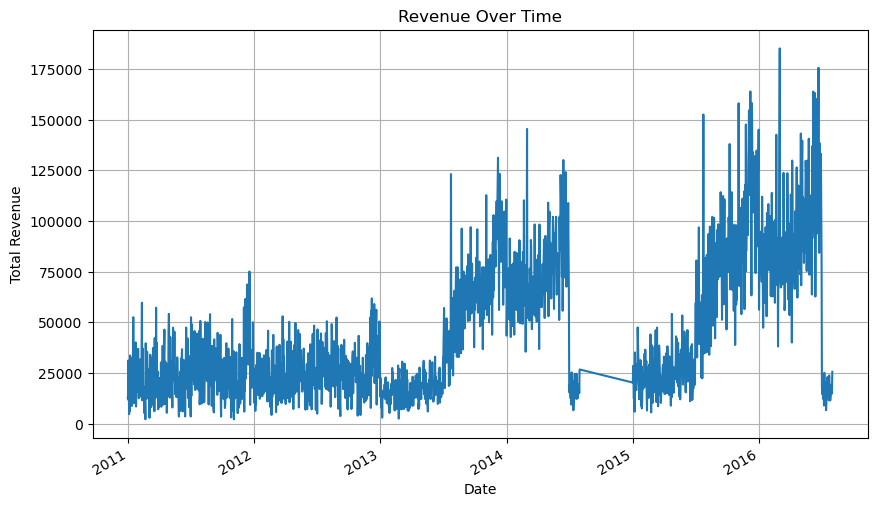

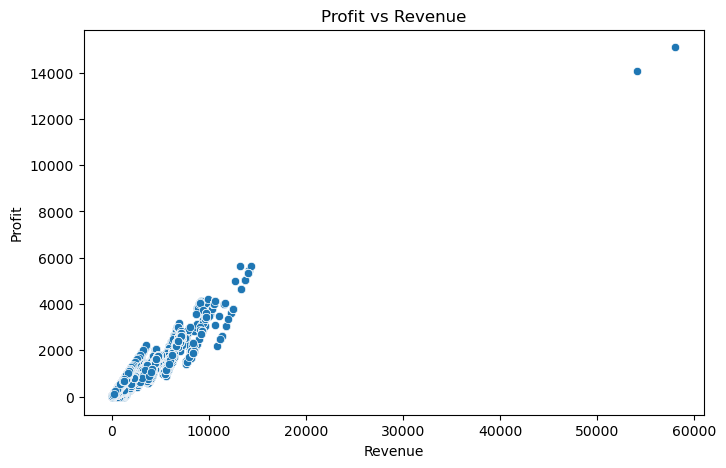

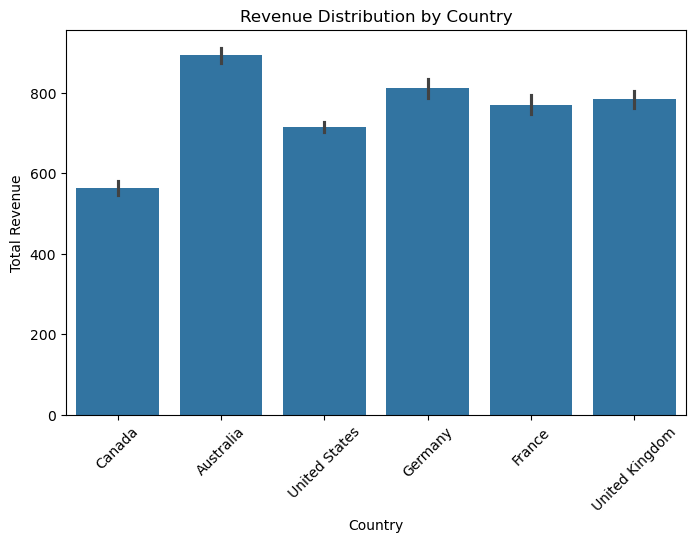

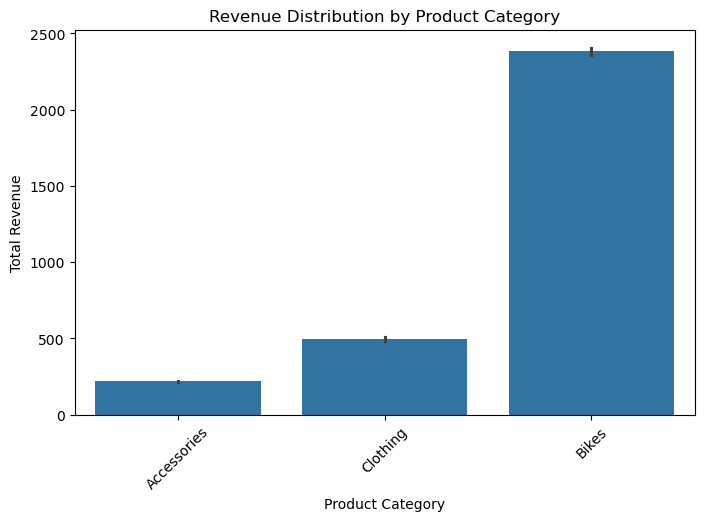

In [17]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 2: Load and Inspect the Dataset
# Load the sales data
data = pd.read_csv('sales_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the shape and data types of the dataset
print("Shape of the dataset:", data.shape)
print("Data types of the dataset:", data.dtypes)

# Step 3: Check Column Names and Remove Spaces
# Print the column names to check if 'Region', 'Sales', 'Discount' exist and there are no issues
print("Columns in the dataset:", data.columns)

# Strip any leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Check if 'Sales', 'Discount', and 'Region' columns exist
if 'Sales' not in data.columns:
    print("The 'Sales' column does not exist.")
else:
    print("'Sales' column is present.")

if 'Discount' not in data.columns:
    print("The 'Discount' column does not exist.")
else:
    print("'Discount' column is present.")

if 'Region' not in data.columns:
    print("The 'Region' column does not exist.")
else:
    print("'Region' column is present.")

# Step 4: Data Cleaning (Fill Missing Values and Handle Issues)
data_cleaned = data.drop_duplicates()

# Fill missing values (if any) with the mean or median for numeric columns
data_cleaned.loc[:, 'Profit'] = data_cleaned['Profit'].fillna(data_cleaned['Profit'].mean())

# Fill missing values for 'Revenue' column
data_cleaned.loc[:, 'Revenue'] = data_cleaned['Revenue'].fillna(data_cleaned['Revenue'].mean())

# Convert the Date column to a datetime object for trend analysis
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%Y-%m-%d')

# Step 5: Exploratory Data Analysis (EDA)
# Check column names in cleaned data before plotting
print("Columns in cleaned data:", data_cleaned.columns)

# 1. Plot Time Series of Revenue over time
plt.figure(figsize=(10, 6))

# Plot the trend of Revenue over Time
data_cleaned.groupby('Date')['Revenue'].sum().plot()
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 2. Scatter plot to study the relationship between Profit and Revenue
plt.figure(figsize=(8, 5))

# Plot Profit vs Revenue scatter plot
sns.scatterplot(x='Revenue', y='Profit', data=data_cleaned)
plt.title('Profit vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()

# 3. Visualize Revenue distribution by Country or State (Regional Analysis)
# Since 'Region' column is missing, use 'Country' or 'State'
if 'Country' in data_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Country', y='Revenue', data=data_cleaned)
    plt.title('Revenue Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'Country' column is missing in cleaned data!")

# 4. Visualize Revenue by Product Category
if 'Product_Category' in data_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Product_Category', y='Revenue', data=data_cleaned)
    plt.title('Revenue Distribution by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'Product_Category' column is missing in cleaned data!")
